In [1]:
import os
import gcsfs
import xarray as xr
import intake

## Read data from my Google Cloud Storage

In [2]:
# Define cloud file system access point:
fs = gcsfs.GCSFileSystem(project='poised-honor-358', token='anon', access='read_only')
fs.ls('sonific01/ARGO/')

['sonific01/ARGO/GLOB_HOMOGENEOUS_variables.zarr/',
 'sonific01/ARGO/NATL_HOMOGENEOUS_variables_7subset_3.nc',
 'sonific01/ARGO/NATL_HOMOGENEOUS_variables_7subset_4.nc',
 'sonific01/ARGO/GLOB_HOMOGENEOUS_variables_3subset_3.nc',
 'sonific01/ARGO/NATL_HOMOGENEOUS_variables_7subset_7.nc',
 'sonific01/ARGO/NATL_HOMOGENEOUS_variables_7subset_6.nc',
 'sonific01/ARGO/',
 'sonific01/ARGO/NATL_HOMOGENEOUS_full_variables.nc',
 'sonific01/ARGO/NATL_HOMOGENEOUS_variables_7subset_1.nc',
 'sonific01/ARGO/Global_Argo_VerticalMean_Temperature.zarr/',
 'sonific01/ARGO/Global_Argo_VerticalMean_Temperature.nc',
 'sonific01/ARGO/GLOB_HOMOGENEOUS_variables_3subset_2.nc',
 'sonific01/ARGO/GLOB_HOMOGENEOUS_variables_3subset_1.nc',
 'sonific01/ARGO/NATL_HOMOGENEOUS_variables_7subset_2.nc',
 'sonific01/ARGO/NATL_HOMOGENEOUS_variables_7subset_5.nc']

In [3]:
# Load a dataset:
gcsmap = gcsfs.mapping.GCSMap('sonific01/ARGO/Global_Argo_VerticalMean_Temperature.zarr', gcs=fs)
ds = xr.open_zarr(gcsmap)
print(ds)

<xarray.Dataset>
Dimensions:    (N_PROF: 67010)
Coordinates:
    LATITUDE   (N_PROF) float32 dask.array<shape=(67010,), chunksize=(33505,)>
    LONGITUDE  (N_PROF) float32 dask.array<shape=(67010,), chunksize=(33505,)>
    TIME       (N_PROF) datetime64[ns] dask.array<shape=(67010,), chunksize=(33505,)>
Dimensions without coordinates: N_PROF
Data variables:
    BRV2       (N_PROF) float32 dask.array<shape=(67010,), chunksize=(33505,)>
    DBINDEX    (N_PROF) float64 dask.array<shape=(67010,), chunksize=(33505,)>
    PSAL       (N_PROF) float32 dask.array<shape=(67010,), chunksize=(33505,)>
    SIG0       (N_PROF) float32 dask.array<shape=(67010,), chunksize=(33505,)>
    TEMP       (N_PROF) float32 dask.array<shape=(67010,), chunksize=(33505,)>


In [4]:
# Load another dataset:
gcsmap = gcsfs.mapping.GCSMap('sonific01/ARGO/GLOB_HOMOGENEOUS_variables.zarr', gcs=fs)
ds = xr.open_zarr(gcsmap)
print(ds)

<xarray.Dataset>
Dimensions:    (DEPTH: 302, N_PROF: 128910)
Coordinates:
  * DEPTH      (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1495.0 -1500.0 -1505.0
    LATITUDE   (N_PROF) float32 dask.array<shape=(128910,), chunksize=(67010,)>
    LONGITUDE  (N_PROF) float32 dask.array<shape=(128910,), chunksize=(67010,)>
    TIME       (N_PROF) datetime64[ns] dask.array<shape=(128910,), chunksize=(64455,)>
Dimensions without coordinates: N_PROF
Data variables:
    BRV2       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    DBINDEX    (N_PROF) float64 dask.array<shape=(128910,), chunksize=(67010,)>
    PSAL       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    SIG0       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    TEMP       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
Attributes:
    Title:             VENTHSAL-IA
    conventions:       CF-1.6
    con

## Use intake catalog of my data

The catalog also uses the gcsfs entry point, but with intake it's transparent to the user:

In [5]:
cat = intake.Catalog(os.path.expanduser('~/git/github/gmaze/lopsdata/clustering/data/data_tuto.yaml'))
ds = cat.argo_global_homogeneous_sdl.read_chunked()
print(ds)

<xarray.Dataset>
Dimensions:    (DEPTH: 302, N_PROF: 128910)
Coordinates:
  * DEPTH      (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1495.0 -1500.0 -1505.0
    LATITUDE   (N_PROF) float32 dask.array<shape=(128910,), chunksize=(67010,)>
    LONGITUDE  (N_PROF) float32 dask.array<shape=(128910,), chunksize=(67010,)>
    TIME       (N_PROF) datetime64[ns] dask.array<shape=(128910,), chunksize=(64455,)>
Dimensions without coordinates: N_PROF
Data variables:
    BRV2       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    DBINDEX    (N_PROF) float64 dask.array<shape=(128910,), chunksize=(67010,)>
    PSAL       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    SIG0       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    TEMP       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
Attributes:
    Title:             VENTHSAL-IA
    conventions:       CF-1.6
    con

## Read data from Pangeo Google Cloud Storage

In [6]:
# Define cloud file system access point:
fs = gcsfs.GCSFileSystem(project='pangeo-181919', token='anon', access='read_only')
# fs.ls('pangeo-data')

In [7]:
### Load full AVISO Altimetry record
gcsmap = gcsfs.mapping.GCSMap('pangeo-data/dataset-duacs-rep-global-merged-allsat-phy-l4-v3-alt', gcs=fs)
ds = xr.open_zarr(gcsmap)
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 8901)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<shape=(8901, 720, 2), chunksize=(5, 720, 2)>
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
    lon_bnds   (longitude, nv) float32 dask.array<shape=(1440, 2), chunksize=(1440, 2)>
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    err        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    sla        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    ugos       (time, latitude, longitude) float64 dask.array<shape=(8901,

<xarray.DataArray 'sla' (latitude: 720, longitude: 1440)>
dask.array<shape=(720, 1440), dtype=float64, chunksize=(720, 1440)>
Coordinates:
    crs        int32 ...
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
    time       datetime64[ns] 2009-02-12
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    grid_mapping:   crs
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m


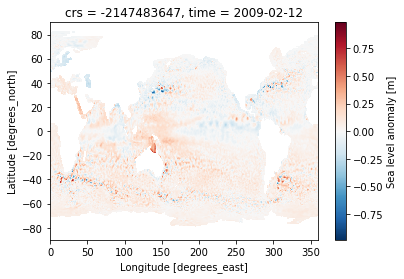

In [10]:
# Load and plot a map
%matplotlib inline
sla = ds['adt'].sel(time='2009-02-12', method='nearest')
print(sla)
sla.plot()

In [ ]:
# Load and plot a time series
# (this slicing is much longer !)
%time sla = ds['adt'].sel(latitude=30, method='nearest').sel(longitude=360-55, method='nearest')
print(sla)
sla.plot()

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 97.1 ms
<xarray.DataArray 'adt' (time: 8901)>
dask.array<shape=(8901,), dtype=float64, chunksize=(5,)>
Coordinates:
    crs        int32 ...
    latitude   float32 30.125
    longitude  float32 305.125
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m
